# 1. Imports and Configurations

In [2]:
import sys
import os
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import pandas as pd
import dataframe_image as dfi

sys.path.append(os.path.join('..', '..', '..'))

import toolkit as tk

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
real_instances, simulated_instances, drawn_instances = tk.get_all_labels_and_files()
tk.load_instance(real_instances[0])

,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
timestamp,,,,,,,,,,,,
2014-01-26 08:01:46,4,WELL-00002,20140126080146,0.0,16166470.0,117.6411,6317682.0,173.0961,4217536.0,NaN,0.0,4
2014-01-26 08:01:47,4,WELL-00002,20140126080146,0.0,16166140.0,117.6411,6329183.0,173.0961,4217533.0,NaN,0.0,4
2014-01-26 08:01:48,4,WELL-00002,20140126080146,0.0,16165810.0,117.6410,6340685.0,173.0961,4217530.0,NaN,0.0,4
2014-01-26 08:01:49,4,WELL-00002,20140126080146,0.0,16165470.0,117.6409,6352186.0,173.0961,4217527.0,NaN,0.0,4
2014-01-26 08:01:50,4,WELL-00002,20140126080146,0.0,16165140.0,117.6408,6363688.0,173.0961,4217523.0,NaN,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-26 09:59:56,4,WELL-00002,20140126080146,0.0,16160380.0,117.6187,7211345.0,173.0961,4350841.0,NaN,0.0,4
2014-01-26 09:59:57,4,WELL-00002,20140126080146,0.0,16160540.0,117.6186,7212635.0,173.0961,4350860.0,NaN,0.0,4
2014-01-26 09:59:58,4,WELL-00002,20140126080146,0.0,16160690.0,117.6185,7213925.0,173.0961,4350879.0,NaN,0.0,4


# Criando um único dataframe com todos os poços reais

In [4]:

# Carregar todos os DataFrames dos arquivos de instâncias reais
df_all_instances_real = [pd.DataFrame(tk.load_instance(instance)) for instance in real_instances]

# Concatenar todos os DataFrames na lista para formar um único DataFrame
df = pd.concat(df_all_instances_real, ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14516197 entries, 0 to 14516196
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   label       int64  
 1   well        object 
 2   id          object 
 3   P-PDG       float64
 4   P-TPT       float64
 5   T-TPT       float64
 6   P-MON-CKP   float64
 7   T-JUS-CKP   float64
 8   P-JUS-CKGL  float64
 9   T-JUS-CKGL  float64
 10  QGL         float64
 11  class       float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1.3+ GB


# Visualizando o percentual de valores não classificado por poço real

In [ ]:
import pandas as pd
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Presumindo que real_instances esteja definido corretamente em algum lugar acima


def plot_events(df):
    wells = df['well'].unique()  # Lista de poços
    tipos_events = {well: 0 for well in wells}  # Inicializa para calcular o percentual de NaNs

    nan_percentages = {well: 0 for well in wells}  # Inicializa para calcular o percentual de NaNs

    for well in wells:
        dataframes_list = []  # Reinicializa a lista para cada poço
        for instance in real_instances:
            instance_path_str = str(instance[1])
            pattern = rf'{well}'
            if re.search(pattern, instance_path_str):           
                try:
                    #df_aux = pd.read_csv(instance[1])  # Lê o DataFrame
                    #dataframes_list.append(df_aux)  # Adiciona à lista

                    dataframes_list.append(pd.DataFrame(tk.load_instance(instance)))

                except Exception as e:
                    print(f"Erro ao ler o arquivo {instance[1]}: {e}")

        if dataframes_list:  # Verifica se a lista não está vazia
            df_well = pd.concat(dataframes_list, ignore_index=True)

            total_values = len(df_well['class'])  # Total de valores na coluna
        
            non_nans = df_well['class'].isna().sum()  # Conta não-NaNs        
            
            percent_nan = (non_nans / total_values)   # Percentual de NaNs
            
            nan_percentages[well] = percent_nan  # Atualiza o dicionário com o percentual de NaNs

            # Verifica se a coluna 'label' existe
            if 'label' in df_well.columns:
                
                unique_label = df_well['label'].unique()   
                tipos_events[well] = unique_label         
                
            else:
                print(f"A coluna 'label' não foi encontrada para o poço {well}.")
                tipos_events[well] = 0  # Ou alguma outra indicação de dado ausente


    # Construindo o DataFrame de presença/ausência
    rows = []
    for well, events in tipos_events.items():
        row = [1 if event in events else 0 for event in range(8)]
        rows.append(row)
    df_presence = pd.DataFrame(rows, index=tipos_events.keys(), columns=range(8))

    # Definindo cores personalizadas para o gráfico de calor
    cmap = ListedColormap(['red', 'green'])

    # Visualização com Seaborn
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(df_presence, cmap=cmap, linewidths=.5, annot=True, cbar=False, yticklabels=True)

    plt.xlabel("Tipos de Eventos")
    plt.ylabel("Poços Reais")
    #plt.title("Presença de Tipos de Eventos por Poço")
    plt.xticks(ticks=[x + 0.5 for x in range(8)], labels=range(8))  # Centraliza os rótulos do eixo x
    plt.tight_layout()
    #plt.savefig('heatmap_events.png', dpi=100, bbox_inches='tight')
    plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Ordenando o dicionário nan_percentages por seus valores (percentual de NaNs) em ordem decrescente
sorted_wells = sorted(nan_percentages.items(), key=lambda x: x[1], reverse=True)

# Separando em duas listas: uma para os poços e outra para os percentuais, já convertendo para percentual
wells = [item[0] for item in sorted_wells]
percent_nans = [item[1] * 100 for item in sorted_wells]  # Convertendo para percentual

# Definindo cores: 'skyblue' para percentuais > 0, 'lightgreen' para percentuais == 0
colors = ['lightgreen' if percent == 0 else 'skyblue' for percent in percent_nans]

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustando o tamanho da figura
bars = plt.bar(wells, percent_nans, color=colors)  # Aplicando as cores

plt.xlabel('Poço')  # Rótulo do eixo x
plt.ylabel('Percentual de Valores NaN (%)')  # Rótulo do eixo y
#plt.title('Percentual de Valores NaN por Poço (Ordenado)')  # Título do gráfico
plt.grid(axis='y')  # Adicionando grid ao eixo y
plt.xticks(rotation=45, ha="right")  # Rotacionando os rótulos do eixo x
plt.tight_layout()  # Ajusta os parâmetros do subplot

# Adicionando rótulos de percentual acima das barras para clareza
for bar, percent in zip(bars, percent_nans):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(percent, 2), ha='center', va='bottom')

# Mostrando o gráfico
plt.show()


# Visualizando a relação de tipos de eventos por poço

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Dados fornecidos


# Construindo o DataFrame de presença/ausência
rows = []
for well, events in tipos_events.items():
    row = [1 if event in events else 0 for event in range(8)]
    rows.append(row)
df_presence = pd.DataFrame(rows, index=tipos_events.keys(), columns=range(8))

# Definindo cores personalizadas para o gráfico de calor
cmap = ListedColormap(['red', 'green'])

# Visualização com Seaborn
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_presence, cmap=cmap, linewidths=.5, annot=True, cbar=False, yticklabels=True)

plt.xlabel("Tipos de Eventos")
plt.ylabel("Poços Reais")
#plt.title("Presença de Tipos de Eventos por Poço")
plt.xticks(ticks=[x + 0.5 for x in range(8)], labels=range(8))  # Centraliza os rótulos do eixo x
plt.tight_layout()
#plt.savefig('heatmap_events.png', dpi=100, bbox_inches='tight')
plt.show()


# Criando um dataframe de treinamento e teste para o ambiente

Critério de seleção dos poços

1. Com mais de três tipos de eventos: 'WELL-00001', 'WELL-00002', 'WELL-00004', 'WELL-00006'
2. Dois poços para equilibrar a falta de eventos: 'WELL-00015', 'WELL-00016'

In [5]:
# Lista de poços para treinamento do modelo
wells_to_include = ['WELL-00001', 'WELL-00002', 'WELL-00004', 'WELL-00006', 'WELL-00015', 'WELL-00016']

# Filtrando o DataFrame para incluir apenas os poços em wells_to_include
df_env = df[df['well'].isin(wells_to_include)]

# Selecionando colunas específicas
columns_to_select = ['P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'class']
df_env = df_env[columns_to_select]

# Apagar linhas que contenham NaNs
df_env = df_env.dropna()

# Mostrando informações do DataFrame filtrado
df_env.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9645620 entries, 0 to 14484284
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   P-PDG      float64
 1   P-TPT      float64
 2   T-TPT      float64
 3   P-MON-CKP  float64
 4   T-JUS-CKP  float64
 5   class      float64
dtypes: float64(6)
memory usage: 515.1 MB


In [6]:
nan_count = df_env.isna().sum()

print(nan_count)

P-PDG        0
P-TPT        0
T-TPT        0
P-MON-CKP    0
T-JUS-CKP    0
class        0
dtype: int64


# Pré-processamento dos Dados

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Suponha que 'df' seja o seu DataFrame do pandas com as colunas corretas
features = df[['P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']]
labels = df['class']

# Criando o dataset a partir de tensores
dataset = tf.data.Dataset.from_tensor_slices((features.values, labels.values))

# Definindo uma função para agrupar características numéricas sob a chave "numeric"
def pack_numeric_features(features, label):
    numeric_features = features
    return {'numeric': numeric_features}, label

# Aplicando a função ao dataset
packed_dataset = dataset.map(pack_numeric_features)

# Agrupando os dados em lotes
batch_size = 32  # Você pode ajustar o tamanho do lote conforme necessário
batched_dataset = packed_dataset.batch(batch_size)

# Extraindo um exemplo de lote e os rótulos do batch
example_batch, labels_batch = next(iter(batched_dataset))

# Exibindo o exemplo do lote e os rótulos para verificação
print("Features batch shape:", example_batch['numeric'].shape)
print("Labels batch shape:", labels_batch.shape)


In [ ]:
train_dataset = dataset.shuffle(len(df)).batch(1)



In [ ]:
def show_batch(dataset):
  for batch, label in dataset.take(1):
    for key, value in batch.items():
      print("{:20s}: {}".format(key,value.numpy()))

In [ ]:
example_batch, labels_batch = next(iter(dataset))


In [ ]:
NUMERIC_FEATURES = ['P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']
desc = df[NUMERIC_FEATURES].describe()
desc


In [ ]:
import numpy as np

MEAN = np.array(desc.T['mean'])
STD = np.array(desc.T['std'])

def normalize_numeric_data(data, mean, std):
  # Center the data
  return (data-mean)/std

In [ ]:
import functools

# Veja o que você acabou de criar.
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, shape=[len(NUMERIC_FEATURES)])
numeric_columns = [numeric_column]
numeric_column

In [ ]:
example_batch['numeric']

In [ ]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)
numeric_layer(example_batch).numpy()

# Carregar dados CSV

Carregar dados CSV de um arquivo em um tf.data.Dataset.

In [7]:
import pandas as pd

# Suponha que df seja o seu DataFrame

# Colunas para normalizar, exceto 'class'
columns_to_normalize = ['P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP']

# Aplicando Z-score Standardization
for col in columns_to_normalize:
    df_env[col] = (df_env[col] - df_env[col].mean()) / df_env[col].std()


# converta a coluna class para valor int
df_env['class'] = df_env['class'].astype(int)

# Verifique as primeiras linhas para confirmar a normalização
df_env.head()



,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,class
0,0.195413,-0.063940,0.178590,0.367639,3.059375,4
1,0.195413,-0.063941,0.178590,0.370626,3.059375,4
2,0.195413,-0.063943,0.178576,0.373613,3.059375,4
3,0.195413,-0.063944,0.178562,0.376600,3.059375,4
4,0.195413,-0.063946,0.178547,0.379587,3.059375,4


In [8]:
import sys
import os
import numpy as np


sys.path.append(os.path.join('..'))

from classes._env3W import env3W  # Ajuste para o caminho correto da sua classe de ambiente


df_test = df_env.sample(frac=0.2)


env = env3W(df_test)

# Testa o método reset para iniciar o ambiente
time_step = env.reset()
print("Estado Inicial:", time_step)

# Executa algumas ações para testar a resposta do ambiente
for _ in range(5):
    action = np.random.randint(0, 2)  # Escolhe uma ação aleatória, 0 ou 1
    time_step = env.step(action)
    print("Após a ação:", action, "Time Step:", time_step)

2024-02-22 10:40:58.156959: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-22 10:40:58.697303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Estado Inicial: TimeStep(
{'step_type': array(0, dtype=int32),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.19541295, -0.04132094,  0.02429613,  1.9017152 , -0.668406  ],
      dtype=float32)})
Após a ação: 1 Time Step: TimeStep(
{'step_type': array(1, dtype=int32),
 'reward': array(-100., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.19541295, -0.07267137,  0.0627199 ,  0.32372755, -0.40941846],
      dtype=float32)})
Após a ação: 0 Time Step: TimeStep(
{'step_type': array(1, dtype=int32),
 'reward': array(1., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.19541295, -0.05456151,  0.33090186, -0.6235317 , -0.04780614],
      dtype=float32)})
Após a ação: 0 Time Step: TimeStep(
{'step_type': array(1, dtype=int32),
 'reward': array(1., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.19541295, -0.04123033,  0.00585443,  1.909995  , 

In [9]:
from tf_agents.environments import utils
import sys
import os
import numpy as np


sys.path.append(os.path.join('..'))

from classes._env3W import env3W  # Ajuste para o caminho correto da sua classe de ambiente

df_test = df_env.sample(frac=0.002)
df_test = df_test.reset_index(drop=True)

env = env3W(df_test)

utils.validate_py_environment(env, episodes=5)

In [10]:
df_test['class'].unique()


array([  4,   0, 107, 101,   7,   3,   6,   1, 105, 102, 106,   5])

# Setup

In [11]:
import reverb
import tensorflow as tf
import pandas as pd
import sys
import os
import numpy as np


sys.path.append(os.path.join('..'))

from classes._env3W import env3W  # Ajuste para o caminho correto da sua classe de ambiente


from tf_agents.environments import tf_py_environment
from tf_agents.networks import q_network
from tf_agents.agents.dqn import dqn_agent
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.drivers import dynamic_step_driver
from tf_agents.trajectories import trajectory
from tf_agents.utils import common
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver
from tf_agents.utils import common
from tf_agents.specs import tensor_spec
from tf_agents.networks import sequential
from tf_agents.drivers import py_driver
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import sequential
from tf_agents.policies import py_tf_eager_policy
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils     

# Hiperparâmentros

In [12]:
# Configurações iniciais
num_iterations = 20000  # ou mais, dependendo da complexidade do ambiente

initial_collect_steps = 1000  # Número de passos de coleta inicial
collect_steps_per_iteration = 1  # Passos de coleta por iteração de treinamento
replay_buffer_max_length = 100000  # Tamanho máximo do replay buffer

log_interval = 1000  # Log do progresso a cada 1000 iterações de treinamento
eval_interval = 5000  # Avaliação do desempenho do agente a cada 5000 iterações
batch_size = 64  # Exemplo de tamanho de batch para treinamento
num_iterations = 10000  # Exemplo de número de iterações de treinamento
learning_rate= 1e-3 # Taxa de aprendizado

num_eval_episodes = 10  # @param {type:"integer"}

# Ambiente

No Aprendizado por Reforço (RL), um ambiente representa a tarefa ou problema a ser resolvido. Ambientes padrão podem ser criados em TF-Agents usando conjuntos tf_agents.environments.

1. O ambiente é um repositório di github https://github.com/petrobras/3W
2. O ambiente é composto por dados de seis poços de petróleo, com cinco variáveis (observações) de entrada ['P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP'] e um rótulo indentificador de falha [class]
3. O ambiente é um ambiente de simulação, onde o agente pode escolher entre duas ações: 0 - Não Detectado ou 1 - Detectado para cada observação
4. A recompensa é calculada com base na ação escolhida e no rótulo de falha [class]:

Estados:
- rótulo de falha: 0 - Estado Normal
- rótulo de falha: 1 a 8 - Estável de Anomalia (Falha)
- rótulo de falha: 101 a 108 - Transiente de Anomalia (Falha)

Ações/Recompensas:
- Se o rótulo de falha for 0, a recompensa é 1 se a ação for 0, caso contrário, a recompensa é -100
- Se o rótulo de falha estiver entre 1 e 8, a recompensa é -100 se a ação for 0, caso contrário, a recompensa é 100
- Se o rótulo de falha estiver entre 101 e 108, a recompensa é -10 se a ação for 0, caso contrário, a recompensa é 10

In [13]:
env = env3W(df_test)  # df_test é um dataframe
type(env)

classes._env3W.env3W

In [14]:
env.reset()

TimeStep(
{'step_type': array(0, dtype=int32),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.19541295, -0.06317865,  0.17036067,  0.5893459 ,  3.0593746 ],
      dtype=float32)})

In [15]:
print('Observation Spec:')
print(env.time_step_spec().observation)

Observation Spec:
BoundedArraySpec(shape=(5,), dtype=dtype('float32'), name='observation', minimum=-3.4028234663852886e+38, maximum=3.4028234663852886e+38)


In [16]:
print('Reward Spec:')
print(env.time_step_spec().reward)

Reward Spec:
ArraySpec(shape=(), dtype=dtype('float32'), name='reward')


In [17]:
print('Action Spec:')
print(env.action_spec())

Action Spec:
BoundedArraySpec(shape=(), dtype=dtype('int32'), name='action', minimum=0, maximum=1)


No ambiente env3W:

* Observação é um array de cinco floats:

    * Três sensores de pressão: 'P-PDG', 'P-TPT', 'P-MON-CKP'
    * Dois sensores de temperatura: 'T-TPT', T-JUS-CKP'

* A recompensa é um escalar inteiro.

* A ação é um escalar inteiro com duas possibilidades:

    * 0 — "Não Detectado"
    * 1 — "Detectado"

In [18]:
time_step = env.reset()
print('Time step:')
print(time_step)

action = np.array(1, dtype=np.int32)

next_time_step = env.step(action)
print('Next time step:')
print(next_time_step)

Time step:
TimeStep(
{'step_type': array(0, dtype=int32),
 'reward': array(0., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.19541295, -0.06317865,  0.17036067,  0.5893459 ,  3.0593746 ],
      dtype=float32)})
Next time step:
TimeStep(
{'step_type': array(1, dtype=int32),
 'reward': array(100., dtype=float32),
 'discount': array(1., dtype=float32),
 'observation': array([ 0.19541295, -0.06393073,  0.23204693,  0.57023644,  3.0593746 ],
      dtype=float32)})


Normalmente dois ambientes são instanciados: um para treinamento e outro para avaliação.

In [19]:
train_env = tf_py_environment.TFPyEnvironment(env)
eval_env = tf_py_environment.TFPyEnvironment(env)  # Avaliação pode ser em um env similar ou diferente


# Agente

O algoritmo utilizado para resolver um problema de RL é representado por um Agente. TF-Agents fornece implementações padrão de uma variedade de Agentes, incluindo:

* DQN (Usado para teste)
* REINFORCE
* DDPG
* TD3
* PPO
* SAC

O agente DQN pode ser utilizado em qualquer ambiente que possua um espaço de ação discreto.

No coração de um Agente DQN está uma QNetwork, um modelo de rede neural que pode aprender a prever QValues (retornos esperados) para todas as ações, dada uma observação do ambiente.

Usaremos tf_agents.networks. para criar uma QNetwork. A rede será composta por uma sequência de camadas tf.keras.layers.Dense, onde a camada final terá 1 saída para cada ação possível.

In [20]:
fc_layer_params = (100, 50)  # Exemplo de tamanho das camadas totalmente conectadas
action_tensor_spec = tensor_spec.from_spec(env.action_spec())
num_actions = action_tensor_spec.maximum - action_tensor_spec.minimum + 1

# Defina uma função auxiliar para criar camadas densas configuradas com o direito
# ativação e inicializador do kernel.
def dense_layer(num_units):
  return tf.keras.layers.Dense(
      num_units,
      activation=tf.keras.activations.relu,
      kernel_initializer=tf.keras.initializers.VarianceScaling(
          scale=2.0, mode='fan_in', distribution='truncated_normal'))


# QNetwork consiste em uma sequência de camadas densas seguidas por uma camada densa
# com unidades `num_actions` para gerar um q_value por ação disponível como sua saída.
dense_layers = [dense_layer(num_units) for num_units in fc_layer_params]
q_values_layer = tf.keras.layers.Dense(
    num_actions,
    activation=None,
    kernel_initializer=tf.keras.initializers.RandomUniform(
        minval=-0.03, maxval=0.03),
    bias_initializer=tf.keras.initializers.Constant(-0.2))

Agora use tf_agents.agents.dqn.dqn_agent para instanciar um DqnAgent. Além de time_step_spec, action_spec e QNetwork, o construtor do agente também requer um otimizador (neste caso, AdamOptimizer), uma função de perda e um contador de passos inteiro.

In [21]:

q_net = sequential.Sequential(dense_layers + [q_values_layer])

'''q_net = q_network.QNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=fc_layer_params)'''


'q_net = q_network.QNetwork(\n    train_env.observation_spec(),\n    train_env.action_spec(),\n    fc_layer_params=fc_layer_params)'

In [22]:


optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()

# Política

Uma política define a forma como um agente atua em um ambiente. Normalmente, o objetivo da aprendizagem por reforço é treinar o modelo subjacente até que a política produza o resultado desejado.

* O resultado desejado é a identificar uma falha com base nas observações
* A política retorna uma ação (Não Detectado ou Detectado) para cada observação time_step.

Os agentes contêm duas políticas:

* agent.policy — A política principal usada para avaliação e implantação.
* agent.collect_policy — Uma segunda política usada para coleta de dados.

In [23]:
eval_policy = agent.policy
collect_policy = agent.collect_policy

As políticas podem ser criadas independentemente dos agentes. Por exemplo, use tf_agents.policies.random_tf_policy para criar uma política que selecionará aleatoriamente uma ação para cada time_step.

In [24]:
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

Para obter uma ação de uma política, chame o método policy.action(time_step). O time_step contém a observação do ambiente. Este método retorna um PolicyStep, que é uma tupla nomeada com três componentes:

* ação - a ação a ser executada (neste caso, 0 ou 1)
* estado – usado para políticas com estado (isto é, baseadas em ANN)
* info — dados auxiliares, como log de probabilidades de ações

In [25]:
from tf_agents.trajectories import time_step as ts

time_step = env.reset()

In [26]:
from tf_agents.policies import random_tf_policy

# Exemplo de criação de uma política aleatória
# Supondo que env seja seu ambiente TF-Agents
random_policy = random_tf_policy.RandomTFPolicy(action_spec=env.action_spec(),
                                                 time_step_spec=env.time_step_spec())


# Métricas e Avaliação

A métrica mais comum usada para avaliar uma política é o retorno médio. O retorno é a soma das recompensas obtidas durante a execução de uma política em um ambiente durante um episódio. Vários episódios são executados, criando um retorno médio.

A função a seguir calcula o retorno médio de uma política, dada a política, o ambiente e um número de episódios

In [27]:

#@test {"skip": true}
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


# See also the metrics module for standard implementations of different metrics.
# https://github.com/tensorflow/agents/tree/master/tf_agents/metrics

A execução desse cálculo em random_policy mostra um desempenho de linha de base no ambiente.

In [28]:
compute_avg_return(eval_env, random_policy, num_eval_episodes)


-775564.8

# Replay Buffer

Para acompanhar os dados coletados do ambiente, usaremos o Reverb, um sistema de replay eficiente, extensível e fácil de usar da Deepmind. Ele armazena dados de experiência quando coletamos trajetórias e são consumidos durante o treinamento.

Este buffer de reprodução é construído usando especificações que descrevem os tensores que devem ser armazenados, que podem ser obtidos do agente usando agent.collect_data_spec.

In [29]:
table_name = 'uniform_table'
replay_buffer_signature = tensor_spec.from_spec(
      agent.collect_data_spec)
replay_buffer_signature = tensor_spec.add_outer_dim(
    replay_buffer_signature)

table = reverb.Table(
    table_name,
    max_size=replay_buffer_max_length,
    sampler=reverb.selectors.Uniform(),
    remover=reverb.selectors.Fifo(),
    rate_limiter=reverb.rate_limiters.MinSize(1),
    signature=replay_buffer_signature)

reverb_server = reverb.Server([table])

replay_buffer = reverb_replay_buffer.ReverbReplayBuffer(
    agent.collect_data_spec,
    table_name=table_name,
    sequence_length=2,
    local_server=reverb_server)

rb_observer = reverb_utils.ReverbAddTrajectoryObserver(
  replay_buffer.py_client,
  table_name,
  sequence_length=2)

[reverb/cc/platform/tfrecord_checkpointer.cc:162]  Initializing TFRecordCheckpointer in /tmp/tmp3srwo31o.
[reverb/cc/platform/tfrecord_checkpointer.cc:565] Loading latest checkpoint from /tmp/tmp3srwo31o
[reverb/cc/platform/default/server.cc:71] Started replay server on port 39371


Para a maioria dos agentes, collect_data_spec é uma tupla nomeada chamada Trajetória, contendo especificações para observações, ações, recompensas e outros itens.

In [30]:
agent.collect_data_spec


Trajectory(
{'step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'observation': BoundedTensorSpec(shape=(5,), dtype=tf.float32, name='observation', minimum=array(-3.4028235e+38, dtype=float32), maximum=array(3.4028235e+38, dtype=float32)),
 'action': BoundedTensorSpec(shape=(), dtype=tf.int32, name='action', minimum=array(0, dtype=int32), maximum=array(1, dtype=int32)),
 'policy_info': (),
 'next_step_type': TensorSpec(shape=(), dtype=tf.int32, name='step_type'),
 'reward': TensorSpec(shape=(), dtype=tf.float32, name='reward'),
 'discount': BoundedTensorSpec(shape=(), dtype=tf.float32, name='discount', minimum=array(0., dtype=float32), maximum=array(1., dtype=float32))})

In [31]:
agent.collect_data_spec._fields


('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

In [ ]:
'''# Configurações para o Replay Buffer
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_max_length)

# Configura o driver para coleta de experiências
collect_driver = DynamicStepDriver(
    env=train_env,
    policy=agent.collect_policy,
    observers=[replay_buffer.add_batch],
    num_steps=collect_steps_per_iteration)

# Função para realizar a coleta de experiências
def collect_step():
    time_step = train_env.current_time_step()
    action_step = agent.collect_policy.action(time_step)
    next_time_step = train_env.step(action_step.action)
    traj = trajectory.from_transition(time_step, action_step, next_time_step)
    replay_buffer.add_batch(traj)'''


In [ ]:
'''collect_driver.run = common.function(collect_driver.run)

# Inicialização do ambiente e do estado
time_step = train_env.reset()
policy_state = agent.collect_policy.get_initial_state(train_env.batch_size)

# Coleção inicial de experiências
for _ in range(initial_collect_steps):
    collect_step()
'''

# Coleção de dados

Agora execute a política aleatória no ambiente por algumas etapas, registrando os dados no buffer de reprodução.

Aqui estamos usando 'PyDriver' para executar o ciclo de coleta de experiência. Você pode aprender mais sobre o driver TF Agents em nosso

In [32]:

#@test {"skip": true}
py_driver.PyDriver(
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      random_policy, use_tf_function=True),
    [rb_observer],
    max_steps=initial_collect_steps).run(env.reset())

(TimeStep(
 {'step_type': array(1, dtype=int32),
  'reward': array(-100., dtype=float32),
  'discount': array(1., dtype=float32),
  'observation': array([ 0.19541295, -0.04115485,  0.01873367,  1.9140881 , -0.6764975 ],
       dtype=float32)}),
 ())

O buffer de repetição agora é uma coleção de trajetórias

In [ ]:
# For the curious:
# Uncomment to peel one of these off and inspect it.
# iter(replay_buffer.as_dataset()).next()
     

O agente precisa de acesso ao buffer de reprodução. Isso é fornecido pela criação de um pipeline tf.data.Dataset iterável que alimentará os dados para o agente.

Cada linha do buffer de reprodução armazena apenas uma única etapa de observação. Mas como o Agente DQN precisa da observação atual e da próxima para calcular a perda, o pipeline do conjunto de dados irá amostrar duas linhas adjacentes para cada item no lote (num_steps=2).

Este conjunto de dados também é otimizado executando chamadas paralelas e pré-busca de dados.

In [33]:
# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3,
    sample_batch_size=batch_size,
    num_steps=2).prefetch(3)

dataset

<_PrefetchDataset element_spec=(Trajectory(
{'step_type': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None),
 'observation': TensorSpec(shape=(64, 2, 5), dtype=tf.float32, name=None),
 'action': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None),
 'policy_info': (),
 'next_step_type': TensorSpec(shape=(64, 2), dtype=tf.int32, name=None),
 'reward': TensorSpec(shape=(64, 2), dtype=tf.float32, name=None),
 'discount': TensorSpec(shape=(64, 2), dtype=tf.float32, name=None)}), SampleInfo(key=TensorSpec(shape=(64, 2), dtype=tf.uint64, name=None), probability=TensorSpec(shape=(64, 2), dtype=tf.float64, name=None), table_size=TensorSpec(shape=(64, 2), dtype=tf.int64, name=None), priority=TensorSpec(shape=(64, 2), dtype=tf.float64, name=None), times_sampled=TensorSpec(shape=(64, 2), dtype=tf.int32, name=None)))>

In [34]:

iterator = iter(dataset)
print(iterator)

# Treinando o agente

Duas coisas devem acontecer durante o ciclo de treinamento:

* coletar dados do ambiente
* usar esses dados para treinar a(s) rede(s) neural(is) do agente

Este exemplo também avalia periodicamente a política e imprime a pontuação atual.

O seguinte levará cerca de 5 minutos para ser executado.

In [36]:
#@test {"skip": true}
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step.
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

# Reset the environment.
time_step = env.reset()

# Create a driver to collect experience.
collect_driver = py_driver.PyDriver(
    env,
    py_tf_eager_policy.PyTFEagerPolicy(
      agent.collect_policy, use_tf_function=True),
    [rb_observer],
    max_steps=collect_steps_per_iteration)

for _ in range(num_iterations):

  # Collect a few steps and save to the replay buffer.
  time_step, _ = collect_driver.run(time_step)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience).loss

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (14692) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (14692) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (14692) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (14692) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (14692) so Table uniform_table is accessed directly without gRPC.
[reverb/cc/client.cc:165] Sampler and server are owned by the same process (14692) so Table uniform_table is accessed directly without gRPC.


step = 1000: loss = 38208.19140625
step = 2000: loss = 175540.859375
step = 3000: loss = 56185.64453125
step = 4000: loss = 68899.359375
step = 5000: loss = 105902.1328125
step = 5000: Average Return = -445943.0
step = 6000: loss = 265666.25
step = 7000: loss = 92092.5
step = 8000: loss = 56922.05078125
step = 9000: loss = 120005.203125
step = 10000: loss = 226213.40625
step = 10000: Average Return = -280886.0


(-454195.85, 250.0)

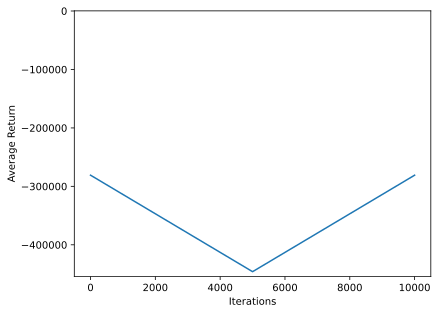

In [37]:
iterations = range(0, num_iterations + 1, eval_interval)
plt.plot(iterations, returns)
plt.ylabel('Average Return')
plt.xlabel('Iterations')
plt.ylim(top=250)

In [ ]:



# Certifique-se de que collect_step está definido para coletar experiências corretamente
def collect_step():
    time_step = train_env.current_time_step()
    action_step = agent.collect_policy.action(time_step)
    next_time_step = train_env.step(action_step.action)
    traj = trajectory.from_transition(time_step, action_step, next_time_step)
    replay_buffer.add_batch(traj)

# Prepara o dataset a partir do replay buffer
dataset = replay_buffer.as_dataset(
    num_parallel_calls=tf.data.experimental.AUTOTUNE,
    sample_batch_size=batch_size,
    num_steps=2).prefetch(tf.data.experimental.AUTOTUNE)

iterator = iter(dataset)

# Loop de treinamento
for i in range(num_iterations):
    # Coleta de novas experiências
    for _ in range(collect_steps_per_iteration):
        collect_step()

    # Amostra um batch de experiências para treinamento
    experiences, unused_info = next(iterator)
    train_loss = agent.train(experiences)

    if i % log_interval == 0:
        print(f'Step = {i}, Loss = {train_loss.loss:.4f}')
    
    if i % eval_interval == 0:
        # Implemente a avaliação do agente aqui
        pass



In [ ]:
from tf_agents.environments import tf_py_environment
from tf_agents.networks import q_network
from tf_agents.agents.dqn import dqn_agent
from tf_agents.utils import common
import tensorflow as tf
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.drivers import dynamic_step_driver
from tf_agents.trajectories import trajectory
from tf_agents.utils import common
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver
import tensorflow as tf
from tf_agents.utils import common
from tf_agents.policies import epsilon_greedy_policy


env = env3W(df_test)  # Supondo que `dataframe` é o seu DataFrame Pandas
train_env = tf_py_environment.TFPyEnvironment(env)
eval_env = tf_py_environment.TFPyEnvironment(env)  # Avaliação pode ser em um env similar ou diferente



fc_layer_params = (100, 50)  # Exemplo de tamanho das camadas totalmente conectadas

q_net = q_network.QNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=fc_layer_params)




train_step_counter = tf.Variable(0)

# Configurando o decaimento exponencial da taxa de aprendizado
initial_learning_rate = 1e-4  # Taxa de aprendizado inicial
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

# Agora, usamos lr_schedule diretamente no otimizador
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=lr_schedule(train_step_counter))



train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()




# Configurações iniciais
num_iterations = 20000  # ou mais, dependendo da complexidade do ambiente
initial_collect_steps = 1000  # Número de passos de coleta inicial
collect_steps_per_iteration = 1  # Passos de coleta por iteração de treinamento
replay_buffer_max_length = 100000  # Tamanho máximo do replay buffer

# Configurações para o Replay Buffer
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_max_length)

epsilon_fn = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1.0,  # Epsilon inicial
    decay_steps=25000,
    end_learning_rate=0.01)  # Epsilon final

epsilon_greedy_policy = epsilon_greedy_policy.EpsilonGreedyPolicy(
    agent.policy,
    epsilon=epsilon_fn(train_step_counter))

# Configura o driver para coleta de experiências
collect_driver = DynamicStepDriver(
    env=train_env,
    policy=epsilon_greedy_policy,
    observers=[replay_buffer.add_batch],
    num_steps=collect_steps_per_iteration)

# Função para realizar a coleta de experiências
def collect_step():
    time_step = train_env.current_time_step()
    action_step = agent.collect_policy.action(time_step)
    next_time_step = train_env.step(action_step.action)
    traj = trajectory.from_transition(time_step, action_step, next_time_step)
    replay_buffer.add_batch(traj)

collect_driver.run = common.function(collect_driver.run)


# Inicialização do ambiente e do estado
time_step = train_env.reset()
policy_state = agent.collect_policy.get_initial_state(train_env.batch_size)


# Coleção inicial de experiências
for _ in range(initial_collect_steps):
    collect_step()




log_interval = 1000  # Log do progresso a cada 1000 iterações de treinamento
eval_interval = 5000  # Avaliação do desempenho do agente a cada 5000 iterações
batch_size = 64  # Exemplo de tamanho de batch para treinamento
num_iterations = 10000  # Exemplo de número de iterações de treinamento


# Certifique-se de que collect_step está definido para coletar experiências corretamente
def collect_step():
    time_step = train_env.current_time_step()
    action_step = agent.collect_policy.action(time_step)
    next_time_step = train_env.step(action_step.action)
    traj = trajectory.from_transition(time_step, action_step, next_time_step)
    replay_buffer.add_batch(traj)

# Prepara o dataset a partir do replay buffer
dataset = replay_buffer.as_dataset(
    num_parallel_calls=tf.data.experimental.AUTOTUNE,
    sample_batch_size=batch_size,
    num_steps=2).prefetch(tf.data.experimental.AUTOTUNE)

iterator = iter(dataset)

# Loop de treinamento
for i in range(num_iterations):
    # Coleta de novas experiências
    for _ in range(collect_steps_per_iteration):
        collect_step()

    # Amostra um batch de experiências para treinamento
    experiences, unused_info = next(iterator)
    train_loss = agent.train(experiences)

    if i % log_interval == 0:
        print(f'Step = {i}, Loss = {train_loss.loss:.4f}')
    
    if i % eval_interval == 0:
        # Implemente a avaliação do agente aqui
        pass
